In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración para gráficos
%matplotlib inline
sns.set(style="whitegrid")

# Cargar dataset
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Mostrar primeras filas
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Limpieza de Datos

### Eliminación de registros duplicados


In [4]:
print(f"Duplicados antes de eliminar: {df.duplicated().sum()}")
df = df.drop_duplicates()
print(f"Duplicados después de eliminar: {df.duplicated().sum()}")


Duplicados antes de eliminar: 0
Duplicados después de eliminar: 0


### Verificación y corrección de tipos de datos


In [5]:
print("\nTipos de datos iniciales:")
print(df.dtypes)




Tipos de datos iniciales:
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [6]:
# Convertimos TotalCharges a numérico, porque a veces viene como object (por valores vacíos)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

print("\nTipos de datos después de convertir TotalCharges:")
print(df.dtypes)



Tipos de datos después de convertir TotalCharges:
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object


In [7]:
## 1.3 Valores categóricos inconsistentes
# Homogeneizar cadenas de texto en columnas categóricas
cols_categoricas = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                   'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                   'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
                   'PaperlessBilling', 'PaymentMethod', 'Churn']

for col in cols_categoricas:
    df[col] = df[col].str.lower().str.strip()

print("\nValores únicos columna 'gender':", df['gender'].unique())



Valores únicos columna 'gender': ['female' 'male']


In [8]:
## 1.4 Valores faltantes
print("\nValores faltantes por columna:")
print(df.isnull().sum())



Valores faltantes por columna:
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [9]:
# Rellenar valores faltantes
# Para columnas numéricas con medianas
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())


In [10]:
# Para columnas categóricas con 'desconocido'
for col in cols_categoricas:
    df[col] = df[col].fillna('desconocido')

print("\nValores faltantes después de rellenar:")
print(df.isnull().sum())



Valores faltantes después de rellenar:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [11]:
## 1.5 Valores erróneos (por ejemplo tenure no puede ser negativo o mayor a 100)
print("\nResumen de tenure:")
print(df['tenure'].describe())




Resumen de tenure:
count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64


In [12]:
# Verificar si hay tenure erróneo (ejemplo > 72 meses, suponiendo 6 años max)
print(df[df['tenure'] > 72])

Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

[0 rows x 21 columns]


# 2. Visualización univariada

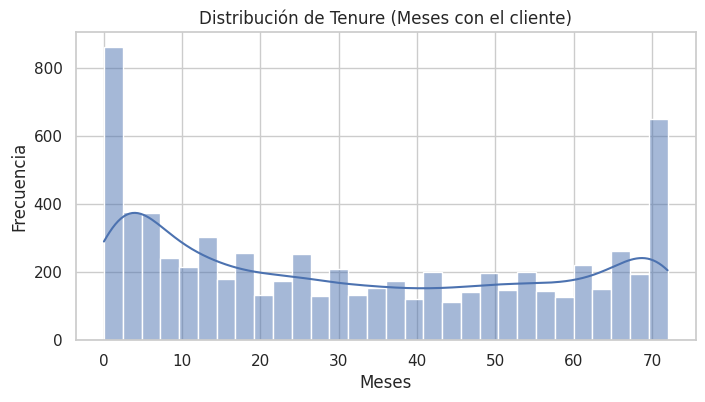

In [13]:

# Histograma tenure
plt.figure(figsize=(8,4))
sns.histplot(df['tenure'], bins=30, kde=True)
plt.title('Distribución de Tenure (Meses con el cliente)')
plt.xlabel('Meses')
plt.ylabel('Frecuencia')
plt.show()


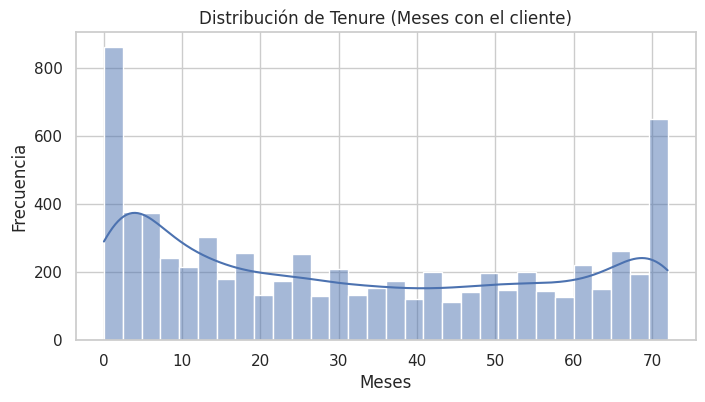

In [14]:
# Histograma tenure
plt.figure(figsize=(8,4))
sns.histplot(df['tenure'], bins=30, kde=True)
plt.title('Distribución de Tenure (Meses con el cliente)')
plt.xlabel('Meses')
plt.ylabel('Frecuencia')
plt.show()

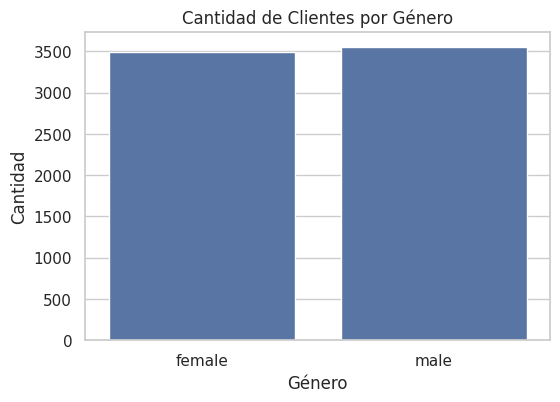

In [15]:
# Conteo de clientes por género
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='gender')
plt.title('Cantidad de Clientes por Género')
plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.show()


# 3. Visualización multivariada


In [18]:

print(df.columns)


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')


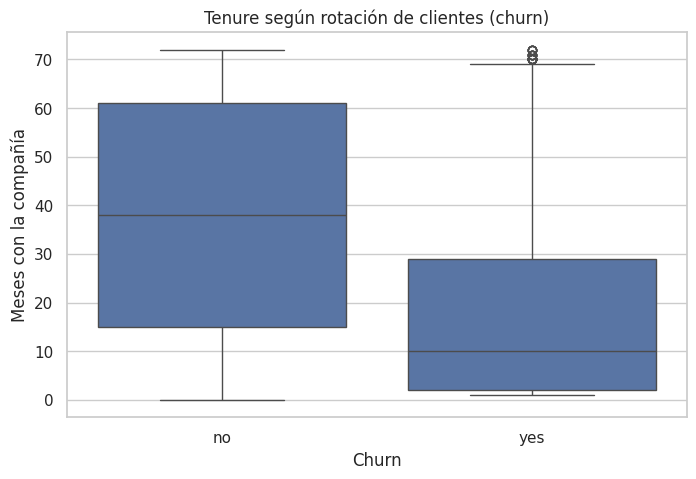

In [19]:
# Convertir nombres de columnas a minúsculas
df.columns = df.columns.str.lower()

# Ahora todas las columnas están en minúsculas
print(df.columns)  # Para verificar

# Gráfico boxplot tenure vs churn (ambas columnas en minúscula)
plt.figure(figsize=(8,5))
sns.boxplot(x='churn', y='tenure', data=df)
plt.title('Tenure según rotación de clientes (churn)')
plt.xlabel('Churn')
plt.ylabel('Meses con la compañía')
plt.show()


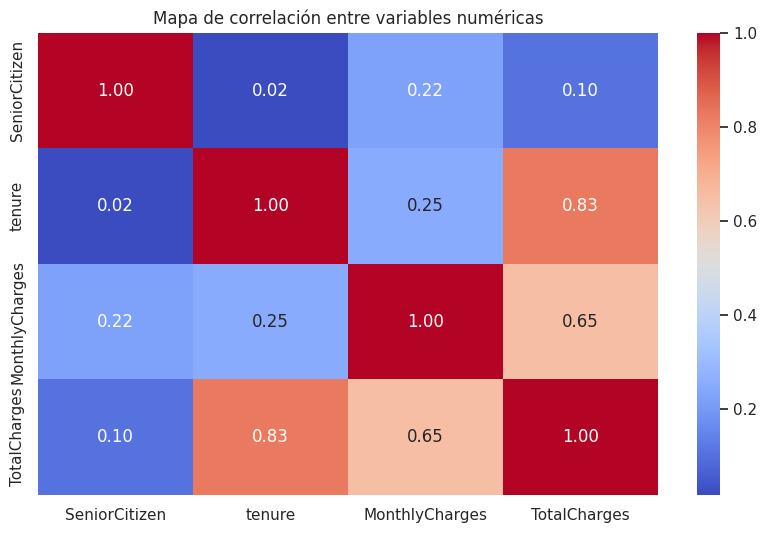

In [17]:
# Mapa de correlaciones para variables numéricas
plt.figure(figsize=(10,6))
corr = df.select_dtypes(include=np.number).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de correlación entre variables numéricas')
plt.show()